# Visual Analysis of Key Phrase Frequencies over the Years

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Importing CSV Files

In [2]:
df_total = pd.read_csv("data/total_phrase_frequencies.csv")
df_yearly = pd.read_csv("data/yearly_phrase_frequencies.csv")

In [3]:
df_total.head()

,Phrase,Total Frequency
0,training,396
1,administrative capacities,207
2,public administration reform,112
3,human resource(s),87
4,civil servants,58


In [4]:
df_yearly.head()

,Phrase,2005,2014,2015,2016,2018,2019,2020,2021,2022,2023,2024
0,human resource(s),4,8,4,6,5,16,7,8,9,13,7
1,human resource(s) management,0,3,3,3,1,5,4,4,3,7,4
2,poor human resource(s) management,0,0,0,0,0,0,0,0,0,1,0
3,monitoring human resource(s),0,0,0,0,0,0,0,0,0,0,0
4,very limited human resource(s),0,0,0,0,0,1,1,1,1,1,0


## Bar Chart

### Horizontal Bar Chart

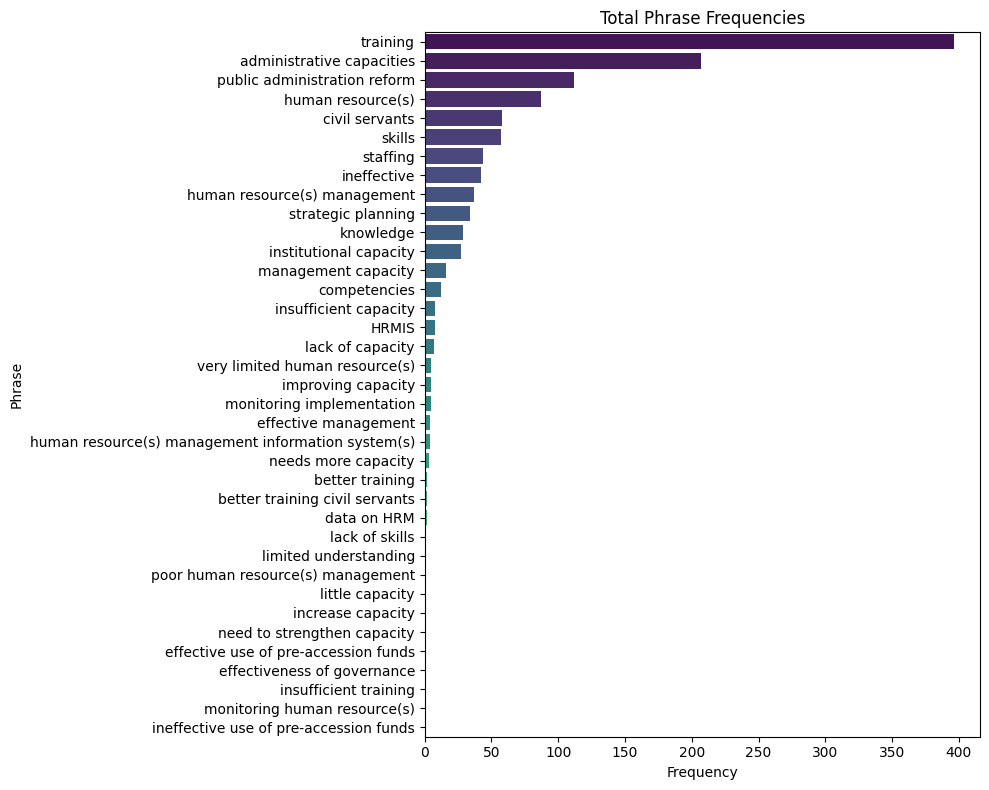

In [5]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_total.sort_values(by="Total Frequency", ascending=False),
    x="Total Frequency",
    y="Phrase",
    hue="Phrase",
    legend=False,
    palette="viridis"
)
plt.title("Total Phrase Frequencies")
plt.xlabel("Frequency")
plt.ylabel("Phrase")
plt.tight_layout()
plt.show()

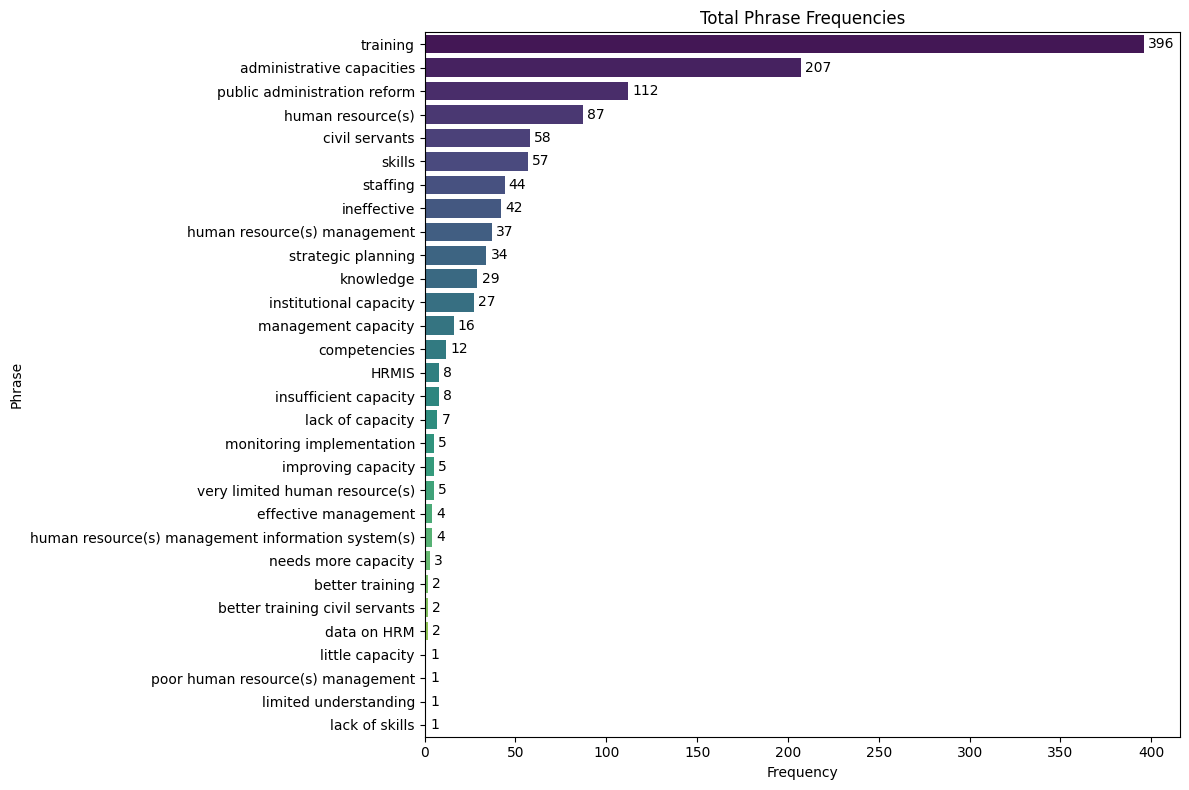

In [18]:
plt.figure(figsize=(12, 8))

df_filtered_total = df_total[df_total["Total Frequency"] > 0].sort_values(by="Total Frequency", ascending=False)

ax = sns.barplot(
    data=df_filtered_total,
    x="Total Frequency",
    y="Phrase",
    hue="Phrase",
    legend=False,
    palette="viridis"
)

plt.title("Total Phrase Frequencies")
plt.xlabel("Frequency")
plt.ylabel("Phrase")

# Add labels next to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.tight_layout()
plt.show()


### Vertical Bar Chart

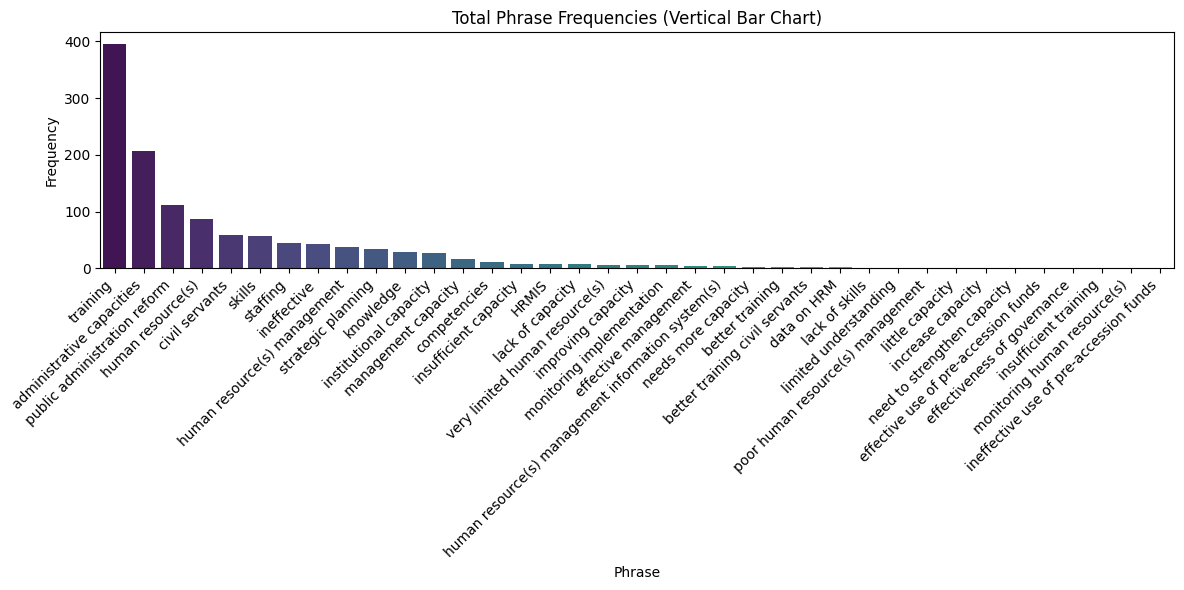

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_total.sort_values(by="Total Frequency", ascending=False),
    x="Phrase",
    y="Total Frequency",
    hue="Phrase",
    legend=False,
    palette="viridis"
)
plt.title("Total Phrase Frequencies (Vertical Bar Chart)")
plt.xlabel("Phrase")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Heatmap

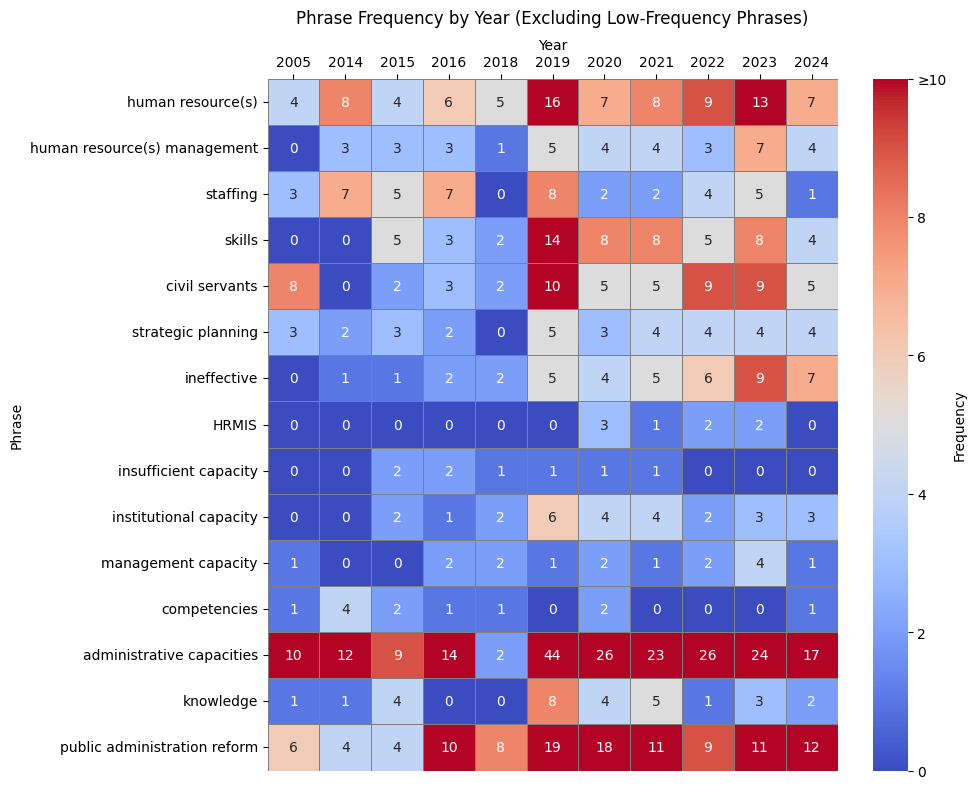

In [7]:
filtered_phrases = df_total[df_total["Total Frequency"] > 7]["Phrase"] # 8 or more occurences
filtered_phrases = filtered_phrases[filtered_phrases.str.lower() != "training"]
df_filtered = df_yearly[df_yearly["Phrase"].isin(filtered_phrases)]
df_heatmap = df_filtered.set_index("Phrase")

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    df_heatmap,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt="d",
    cbar_kws={"label": "Frequency"},
    vmin=0,
    vmax=10
)

colorbar = ax.collections[0].colorbar
ticks = colorbar.get_ticks()
tick_labels = [str(int(t)) for t in ticks]
tick_labels[-1] = "≥" + tick_labels[-1]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels(tick_labels)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.title("Phrase Frequency by Year (Excluding Low-Frequency Phrases)", pad=40)
plt.xlabel("Year")
plt.ylabel("Phrase")
plt.tight_layout()
plt.show()


## Heatmap Sorted

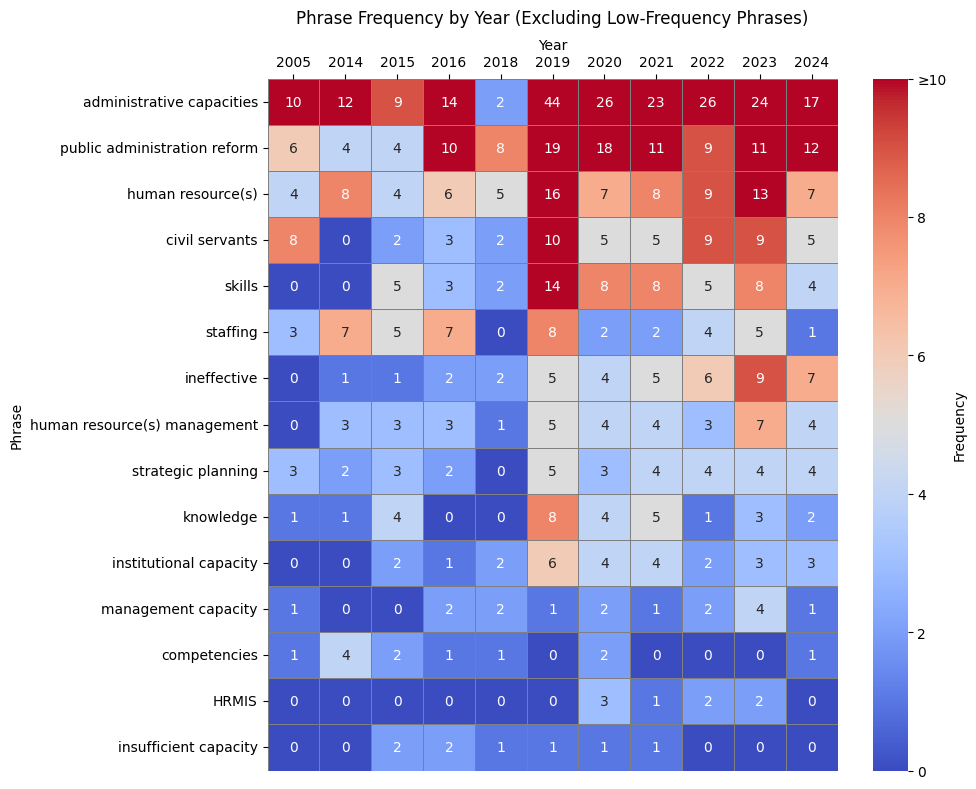

In [8]:
filtered_phrases = df_total[df_total["Total Frequency"] > 7]["Phrase"]
filtered_phrases = filtered_phrases[filtered_phrases.str.lower() != "training"]
df_filtered = df_yearly[df_yearly["Phrase"].isin(filtered_phrases)]
df_heatmap = df_filtered.set_index("Phrase")

df_heatmap = df_heatmap.loc[df_heatmap.sum(axis=1).sort_values(ascending=False).index]  # sort rows by total frequency

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    df_heatmap,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt="d",
    cbar_kws={"label": "Frequency"},
    vmin=0,
    vmax=10
)

colorbar = ax.collections[0].colorbar
ticks = colorbar.get_ticks()
tick_labels = [str(int(t)) for t in ticks]
tick_labels[-1] = "≥" + tick_labels[-1]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels(tick_labels)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.title("Phrase Frequency by Year (Excluding Low-Frequency Phrases)", pad=40)
plt.xlabel("Year")
plt.ylabel("Phrase")
plt.tight_layout()
plt.show()


## Line Chart with Top 5 Phrases

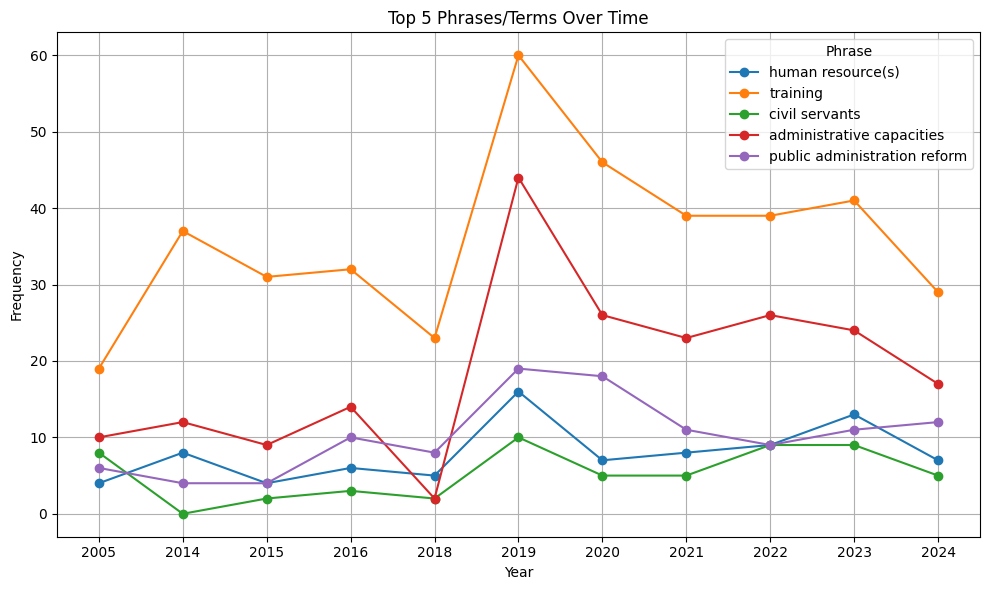

In [9]:
top_5_phrases = df_total.sort_values(by="Total Frequency", ascending=False).head(5)["Phrase"]
df_top5 = df_yearly[df_yearly["Phrase"].isin(top_5_phrases)].set_index("Phrase").T
df_top5.index.name = "Year"
df_top5 = df_top5.reset_index()

plt.figure(figsize=(10, 6))
for phrase in df_top5.columns[1:]:
    plt.plot(df_top5["Year"], df_top5[phrase], marker='o', label=phrase)

plt.title("Top 5 Phrases/Terms Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Phrase", loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Emerging Phrases Line Chart

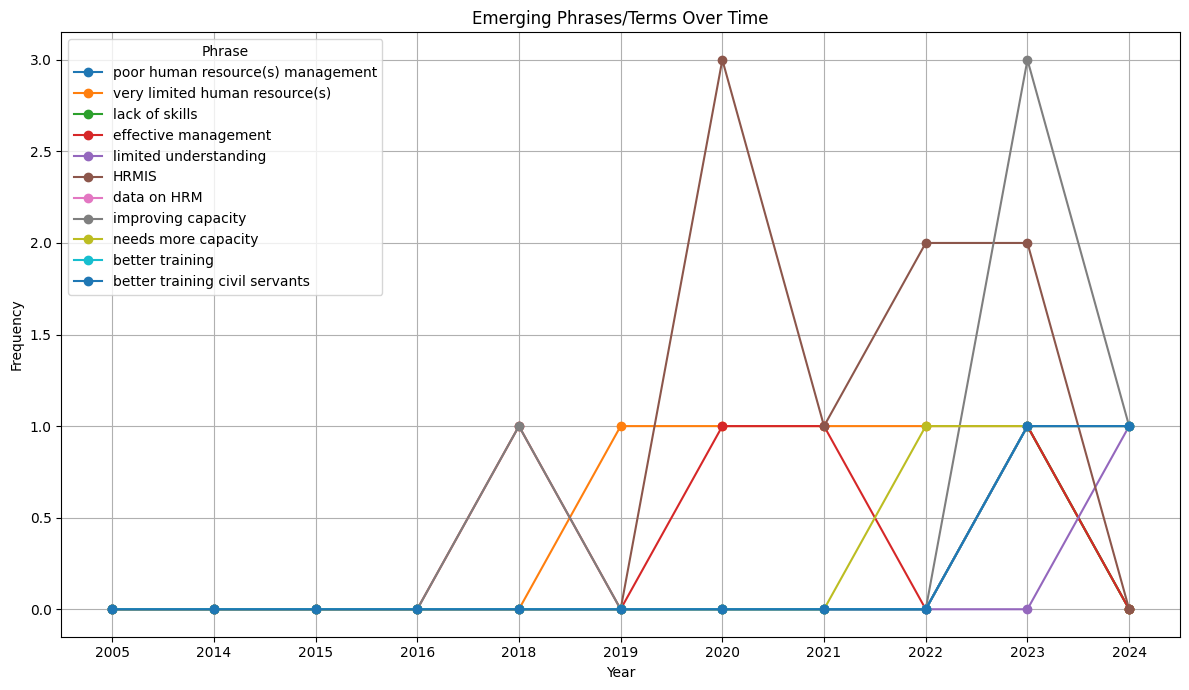

In [10]:
# phrases that were not present in first 4 years but appeared in some of the last 3 years
emerging_phrases = df_yearly[
    (df_yearly[["2005", "2014", "2015", "2016"]].eq(0).sum(axis=1) >= 4) &
    (df_yearly[["2022", "2023", "2024"]].ne(0).any(axis=1))
]["Phrase"]

df_top_emerging = df_yearly[df_yearly["Phrase"].isin(emerging_phrases)].set_index("Phrase").T
df_top_emerging.index.name = "Year"
df_top_emerging = df_top_emerging.reset_index()

plt.figure(figsize=(12, 7))
for phrase in df_top_emerging.columns[1:]:
    plt.plot(df_top_emerging["Year"], df_top_emerging[phrase], marker='o', label=phrase)

plt.title("Emerging Phrases/Terms Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Phrase", loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

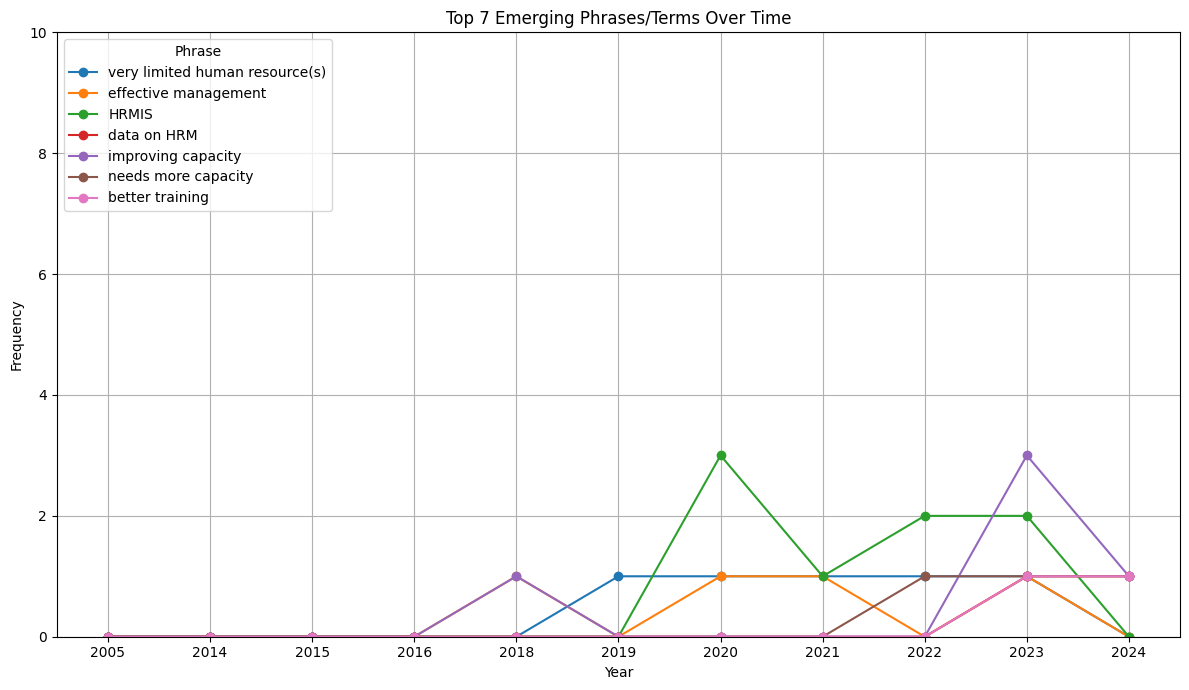

In [16]:
# phrases that were not present in first 4 years but appeared in some of the last 3 years
emerging_phrases = df_yearly[
    (df_yearly[["2005", "2014", "2015", "2016"]].eq(0).sum(axis=1) >= 4) &
    (df_yearly[["2022", "2023", "2024"]].ne(0).any(axis=1))
]

# ONLY SHOW TOP 7 EMERGING PHRASES
top_7_emerging = emerging_phrases.copy()
top_7_emerging["Total"] = top_7_emerging.iloc[:, 1:].sum(axis=1)
top_7_emerging = top_7_emerging.sort_values(by="Total", ascending=False).head(7)

df_top_emerging = df_yearly[df_yearly["Phrase"].isin(top_7_emerging["Phrase"])].set_index("Phrase").T
df_top_emerging.index.name = "Year"
df_top_emerging = df_top_emerging.reset_index()

plt.figure(figsize=(12, 7))
for phrase in df_top_emerging.columns[1:]:
    plt.plot(df_top_emerging["Year"], df_top_emerging[phrase], marker='o', label=phrase)

plt.title("Top 7 Emerging Phrases/Terms Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Phrase", loc="upper left")
plt.grid(True)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


In [12]:
df_top_emerging.head(15)

Phrase,Year,very limited human resource(s),effective management,HRMIS,data on HRM,improving capacity,needs more capacity,better training
0,2005,0,0,0,0,0,0,0
1,2014,0,0,0,0,0,0,0
2,2015,0,0,0,0,0,0,0
3,2016,0,0,0,0,0,0,0
4,2018,0,1,0,0,1,0,0
5,2019,1,0,0,0,0,0,0
6,2020,1,1,3,0,0,0,0
7,2021,1,1,1,0,0,0,0
8,2022,1,0,2,0,0,1,0
9,2023,1,1,2,1,3,1,1


In [13]:
df_top_emerging.columns

Index(['Year', 'very limited human resource(s)', 'effective management',
       'HRMIS', 'data on HRM', 'improving capacity', 'needs more capacity',
       'better training'],
      dtype='object', name='Phrase')

## Stacked Area Chart

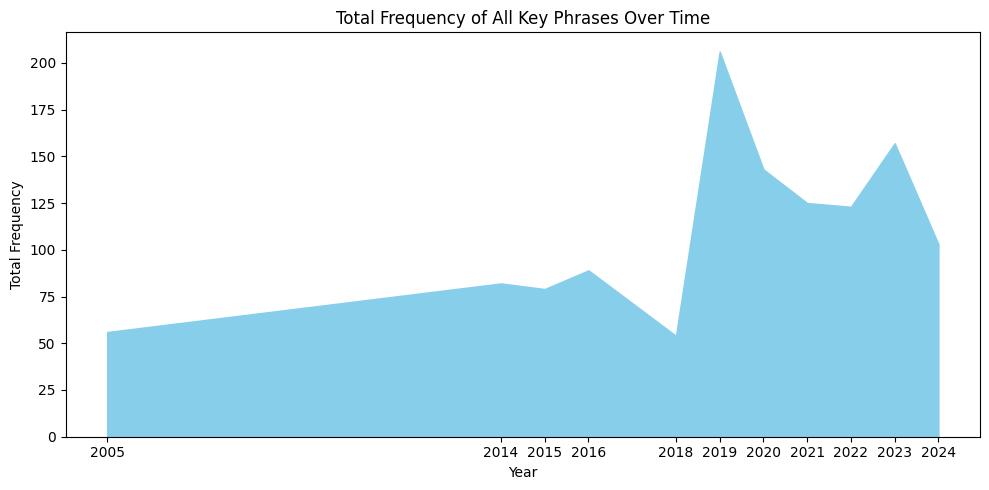

In [14]:
df_area = df_yearly.set_index("Phrase")
df_total_per_year = df_area.sum(axis=0)

years = df_total_per_year.index.astype(int)

plt.figure(figsize=(10, 5))
plt.stackplot(years, df_total_per_year.values, color="skyblue")
plt.xticks(ticks=years, labels=years)
plt.title("Total Frequency of All Key Phrases Over Time")
plt.xlabel("Year")
plt.ylabel("Total Frequency")
plt.tight_layout()
plt.show()


